In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
import seaborn as sns
import numpy as np
mpl.rcParams.update({'figure.autolayout': True, 'figure.dpi': 250})


In [9]:
path_ages = "data/plots/tehpra_ltrs_classified_ages_new_09_04_19.tsv"
path_parts = "data/plots/Stuberosum_genome_parts.gff3"

In [10]:
df_genome_parts = pd.read_csv(path_parts, sep='\t', header=None)
df_genome_parts.columns = ['seqname' , 'source' , 'feature' , 'start' , 'end' , 'score' , 'strand' , 'frame' , 'attribute']
print(len(df_genome_parts.index))
df_genome_parts

35


,seqname,source,feature,start,end,score,strand,frame,attribute
0,chr01,.,euchromatin,0,4500000,.,0,.,.
1,chr01,.,heterochromatin,4500001,34000000,.,0,.,.
2,chr01,.,euchromatin,34000001,88663952,.,0,.,.
3,chr02,.,heterochromatin,0,14000000,.,0,.,.
4,chr02,.,euchromatin,14000001,48614681,.,0,.,.
5,chr03,.,euchromatin,0,4500000,.,0,.,.
6,chr03,.,heterochromatin,4500001,23000000,.,0,.,.
7,chr03,.,euchromatin,23000001,62290286,.,0,.,.
8,chr04,.,euchromatin,0,11000000,.,0,.,.
9,chr04,.,heterochromatin,11000001,32500000,.,0,.,.


In [11]:
df_ages = pd.read_csv(path_ages, sep='\t')
print(len(df_ages.index))
df_ages.head(2)

27591


,ID,Divergence,Age,Ts:Tv
0,RLC_family0_LTR_retrotransposon248_chr00_43732...,0.0775,3875000,11.0785
1,RLC_family0_LTR_retrotransposon829_chr00_19719...,0.0611,3055000,9.7319


In [12]:
df_ages['seqname'] = df_ages['ID'].str.split('_').str[-3:-2].str[0]
df_ages['start'] = df_ages['ID'].str.split('_').str[-2:-1].str[0]
df_ages['end'] = df_ages['ID'].str.split('_').str[-1:].str[0]
df_ages['start'] = pd.to_numeric(df_ages['start'])
df_ages['end'] = pd.to_numeric(df_ages['end'])

In [13]:
df_ages.sample(3)

,ID,Divergence,Age,Ts:Tv,seqname,start,end
11145,RLX_family149_LARD_retrotransposon8953_chr11_1...,0.1019,5095000,2.7686,chr11,19390086,19398655
6544,RLG_singleton_family1022_LTR_retrotransposon10...,0.1300,6500000,1.2513,chr06,26096024,26103675
21260,RLX_singleton_family7898_LTR_retrotransposon15...,0.0674,3370000,4.5009,chr09,46223117,46231163


In [14]:
df_ages = df_ages[df_ages.seqname != 'chr00']
df_ages = df_ages[df_ages.seqname != 'ChrUn']
print(len(df_ages.index))

24763


/home/juan/Desktop/juan/bio/venv/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/juan/Desktop/juan/bio/venv/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/home/juan/Desktop/juan/bio/venv/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure in

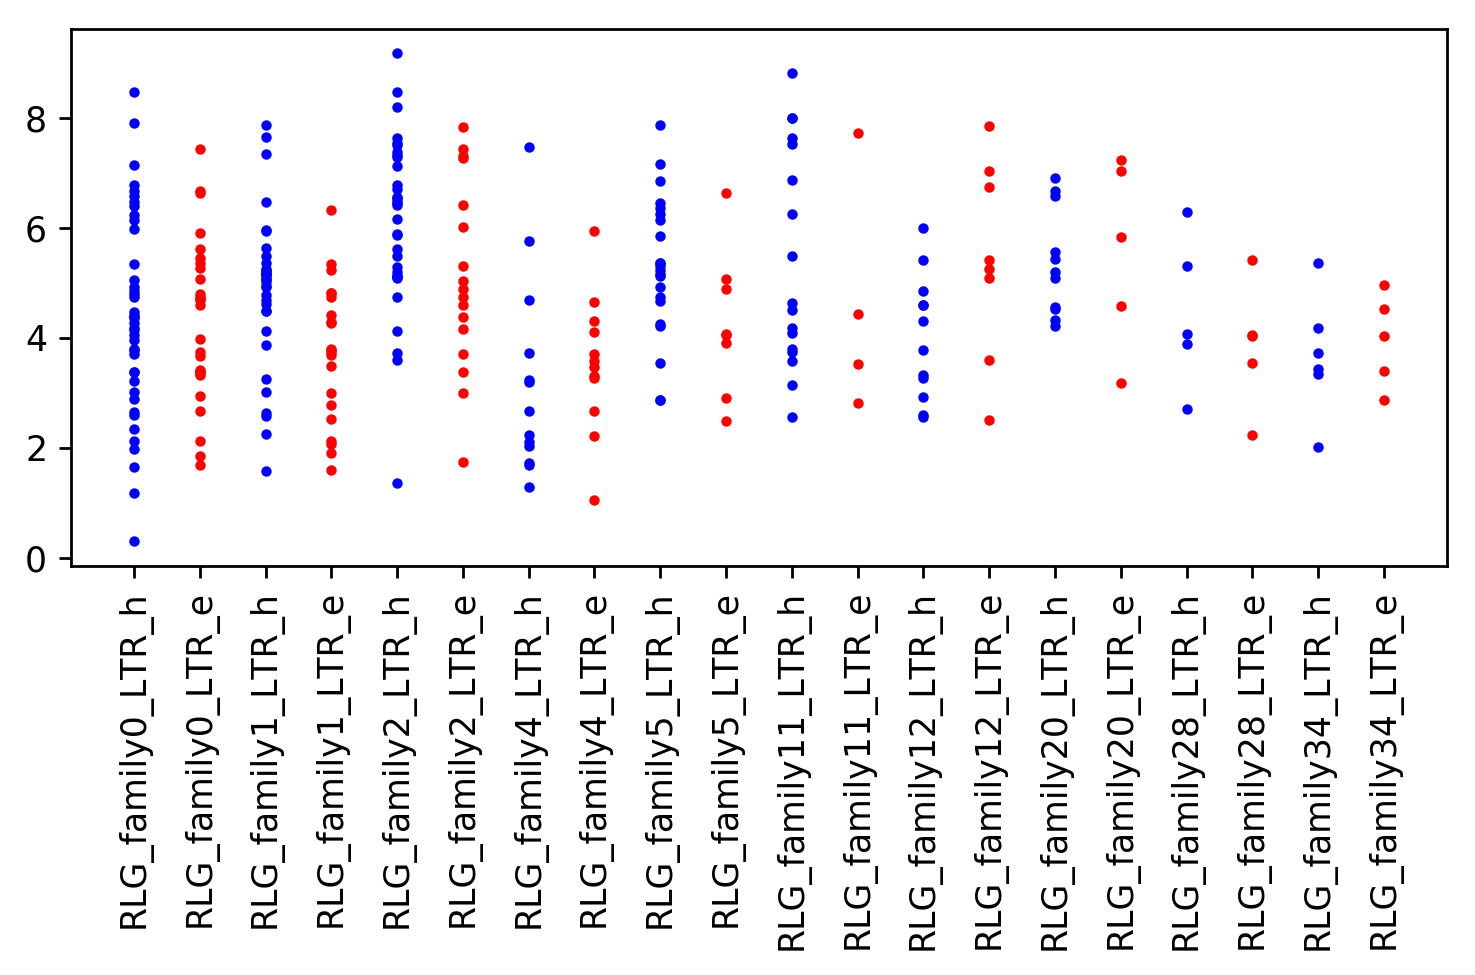

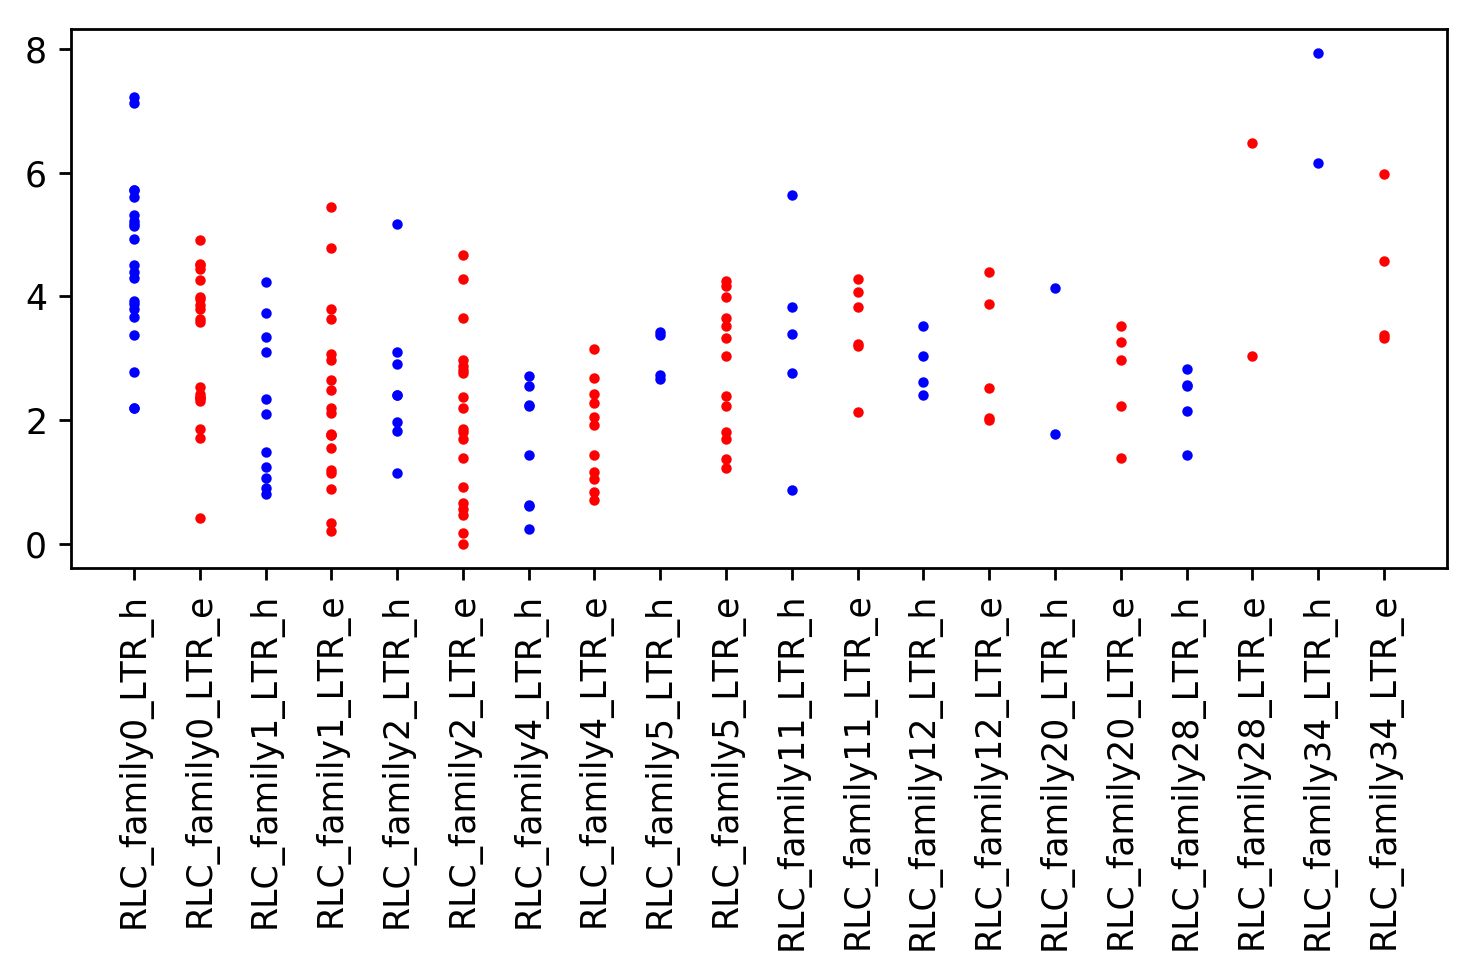

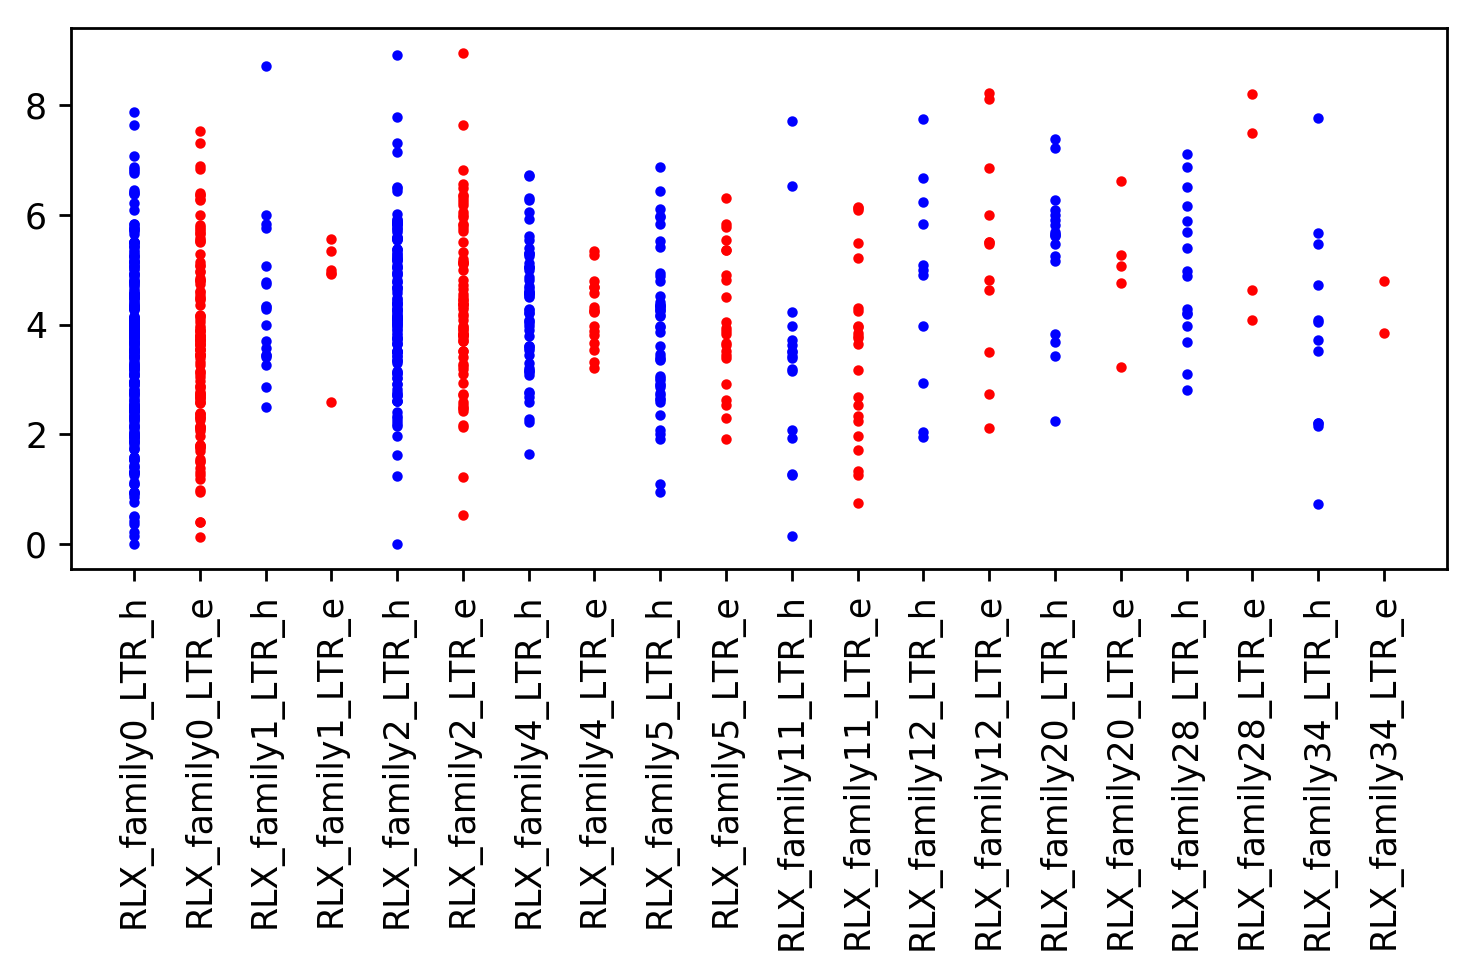

In [15]:
#scatter per family
plots = {}
plots['RLC'] = [0,1,2,4,5,11,12,20,28,34]
plots['RLG'] = [0,1,2,4,5,11,12,20,28,34]
plots['RLX'] = [0,1,2,4,5,11,12,20,28,34]
for what in ['RLG','RLC','RLX']:
    fig = plt.figure()
    plt.xticks(rotation='vertical', )
    plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=2.0)
    for family in plots[what]:#plots[what]:
        for where in ['heterochromatin','euchromatin']:
            df_genome_parts_now = df_genome_parts[df_genome_parts.feature == where]
            df_ages_now = df_ages[(df_ages.ID.str.contains("LTR")) &
                                (df_ages.ID.str.contains(what + '_family'))]

            df_ages_now['ID'] = df_ages_now['ID'].str.split('_').str[0:3].str.join('_')

            saved = []
            for k,v in df_genome_parts_now.iterrows():
                df_filter = df_ages_now[(df_ages_now.seqname == v.seqname) &
                                        (df_ages_now.start <= v.end) &
                                        (df_ages_now.end >= v.start) ]
                saved.append(df_filter)
            df_res = pd.concat(saved)

            df_res_f = df_res[df_res.ID.str.contains(what + '_family' + str(family) + '_')]
            df_res_f.ID = df_res_f.ID + '_' + where[0:1]
            df_res_f.to_csv('data/plots/scatter_' + what + '/data_' + str(family) + '_' +  where +'.csv',sep='\t', index=None)
            y = (df_res_f.Age / 1000000).tolist()
            x = df_res_f.ID
            #x.fill(pos)
            if where == 'heterochromatin':
                color = 'blue'
            else:
                color = 'red'
            plt.plot(x, y, 'o', color=color, markersize=2)
    fig.savefig('data/plots/scatter_' + what +'/scatter.svg')

In [16]:
#boxplot per family 1/2

for k,v in df_genome_parts.iterrows():
    df_ages.loc[(df_ages.seqname == v.seqname) &
                (df_ages.start <= v.end) &
                (df_ages.end >= v.start) ,
                'where'] = v.feature


In [17]:
df_ages.sample(3)

,ID,Divergence,Age,Ts:Tv,seqname,start,end,where
13161,RLX_family721_LARD_retrotransposon9267_chr11_4...,0.0416,2080000,2.6447,chr11,43223196,43227024,euchromatin
11407,RLX_family196_LTR_retrotransposon4456_chr02_21...,0.0102,510000,4.0764,chr02,21420160,21425216,euchromatin
15701,RLX_singleton_family2339_LARD_retrotransposon3...,0.0907,4535000,22.3146,chr04,1756257,1759182,euchromatin


In [18]:
#boxplot per family 2/2
plots = {}
plots['RLC'] = [0,1,2,4,5,11,12,20,28,34]
plots['RLG'] = [0,1,2,4,5,11,12,20,28,34]
plots['RLX'] = [0,1,2,4,5,11,12,20,28,34]

for te_type in ['RLC', 'RLG', 'RLX']:
    for family_n in plots[te_type]:
        data = df_ages[(df_ages.ID.str.contains('LTR')) &
                       (df_ages.ID.str.contains(te_type + "_family" + str(family_n) + "_LTR"))]
        if len(data.index) == 0:
            continue
        fig = plt.figure()
        order=["heterochromatin", "euchromatin"]
        sns_plot = sns.boxplot(y='Age', x='where', 
                     data=data,
                     width=0.5,
                     palette="colorblind",
                      order=order)
        data.to_csv('data/plots/boxplot_' + te_type + '/data_' + str(family_n) +'.csv',sep='\t', index=None)
        sns_plot.figure.savefig("data/plots/boxplot_" + te_type + "/" + te_type + "_" + str(family_n) + ".svg")
        plt.close()

/home/juan/Desktop/juan/bio/venv/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/juan/Desktop/juan/bio/venv/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/home/juan/Desktop/juan/bio/venv/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure in

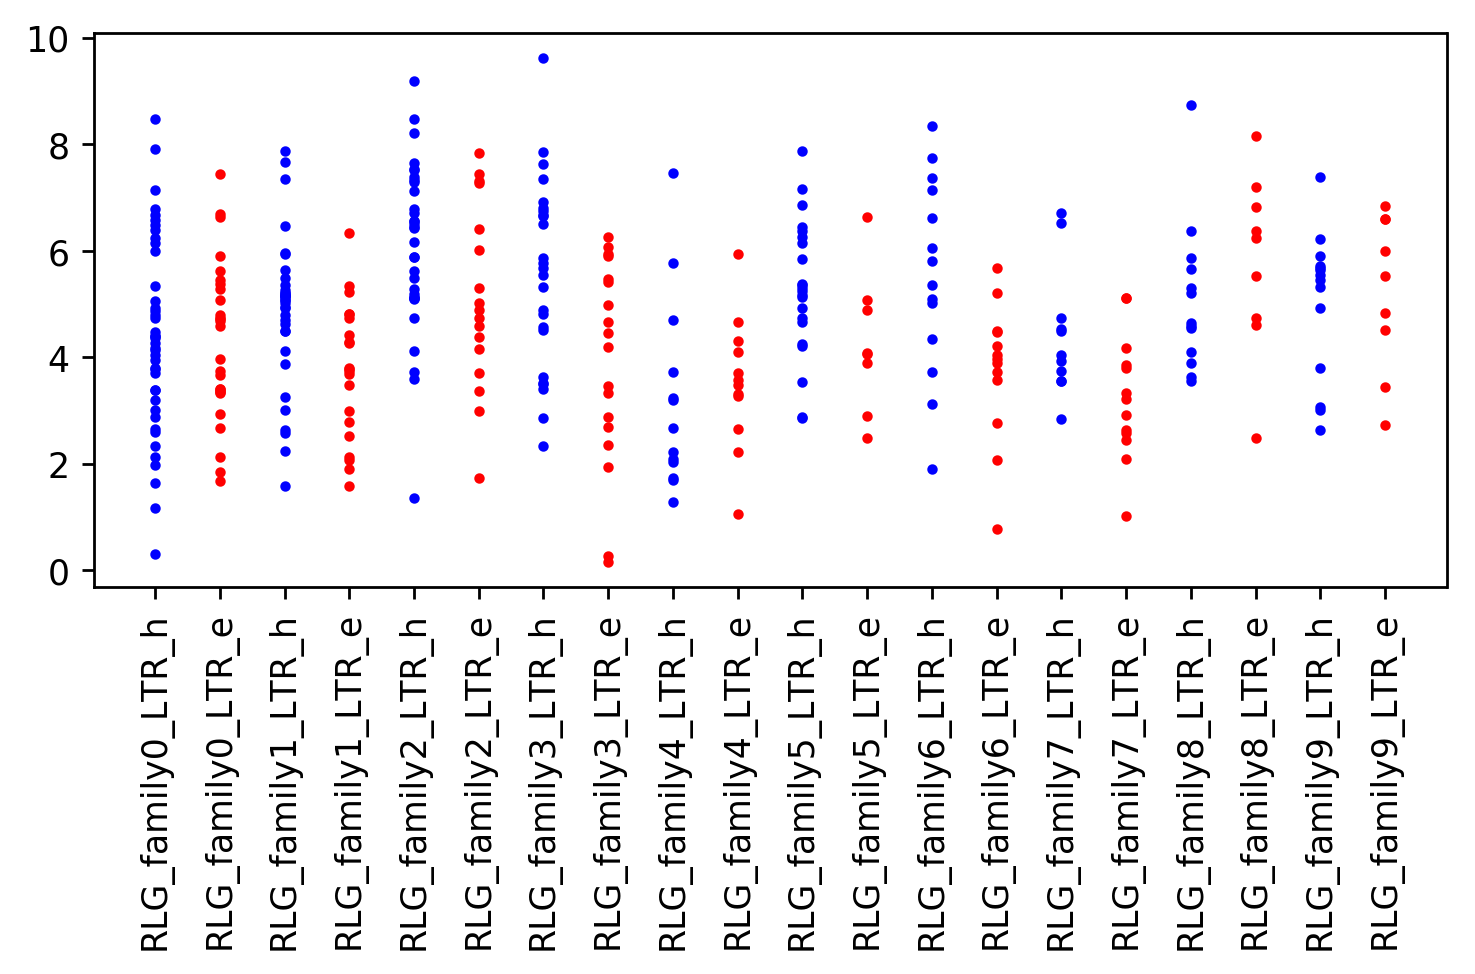

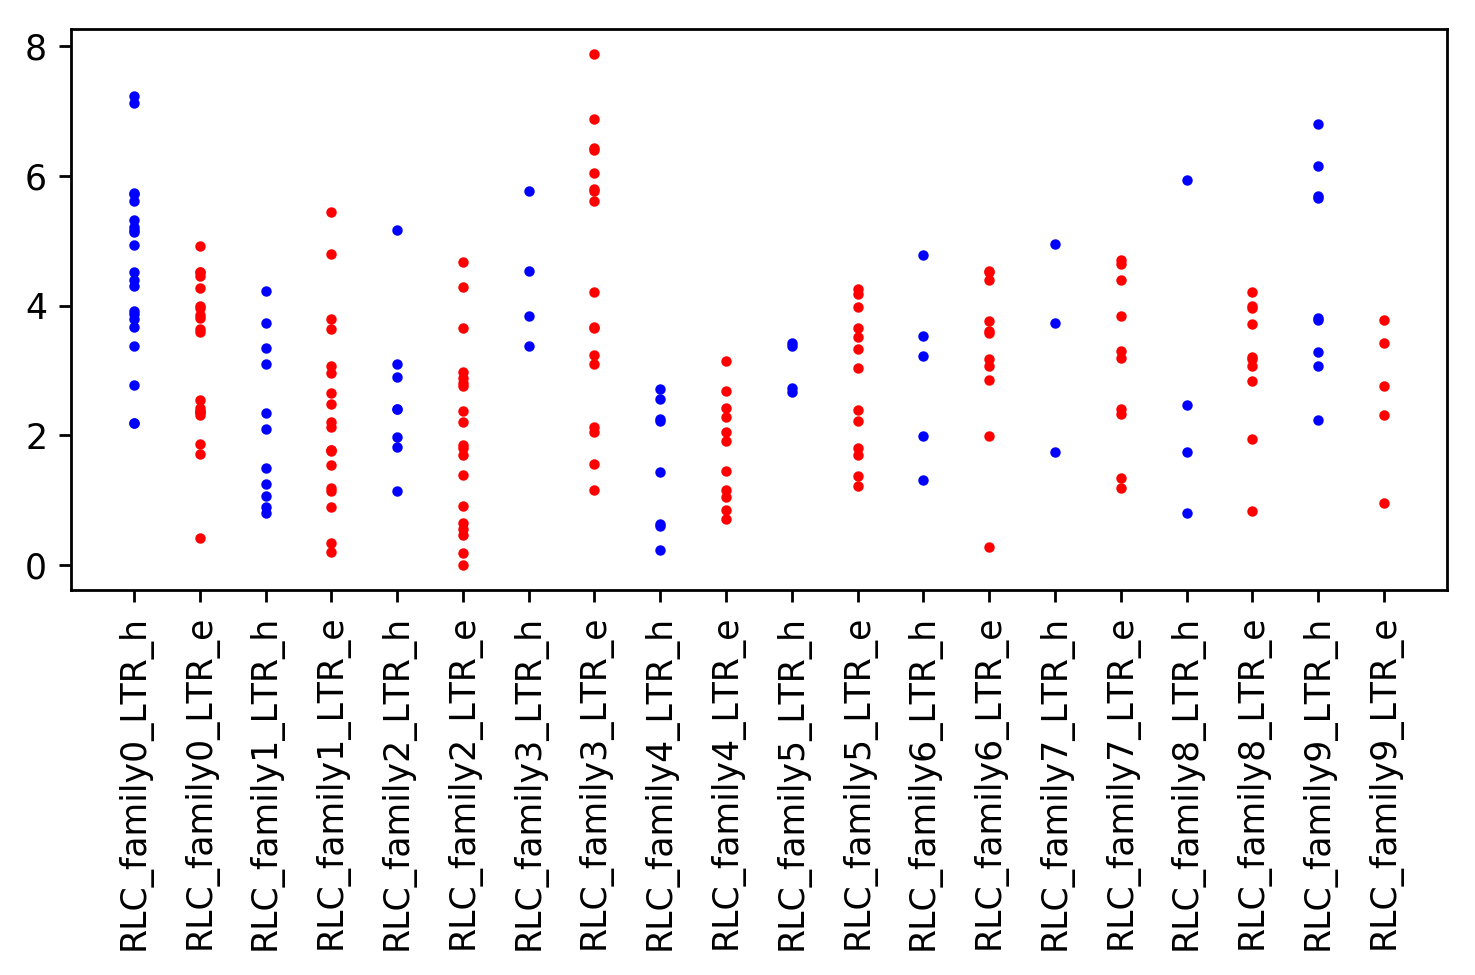

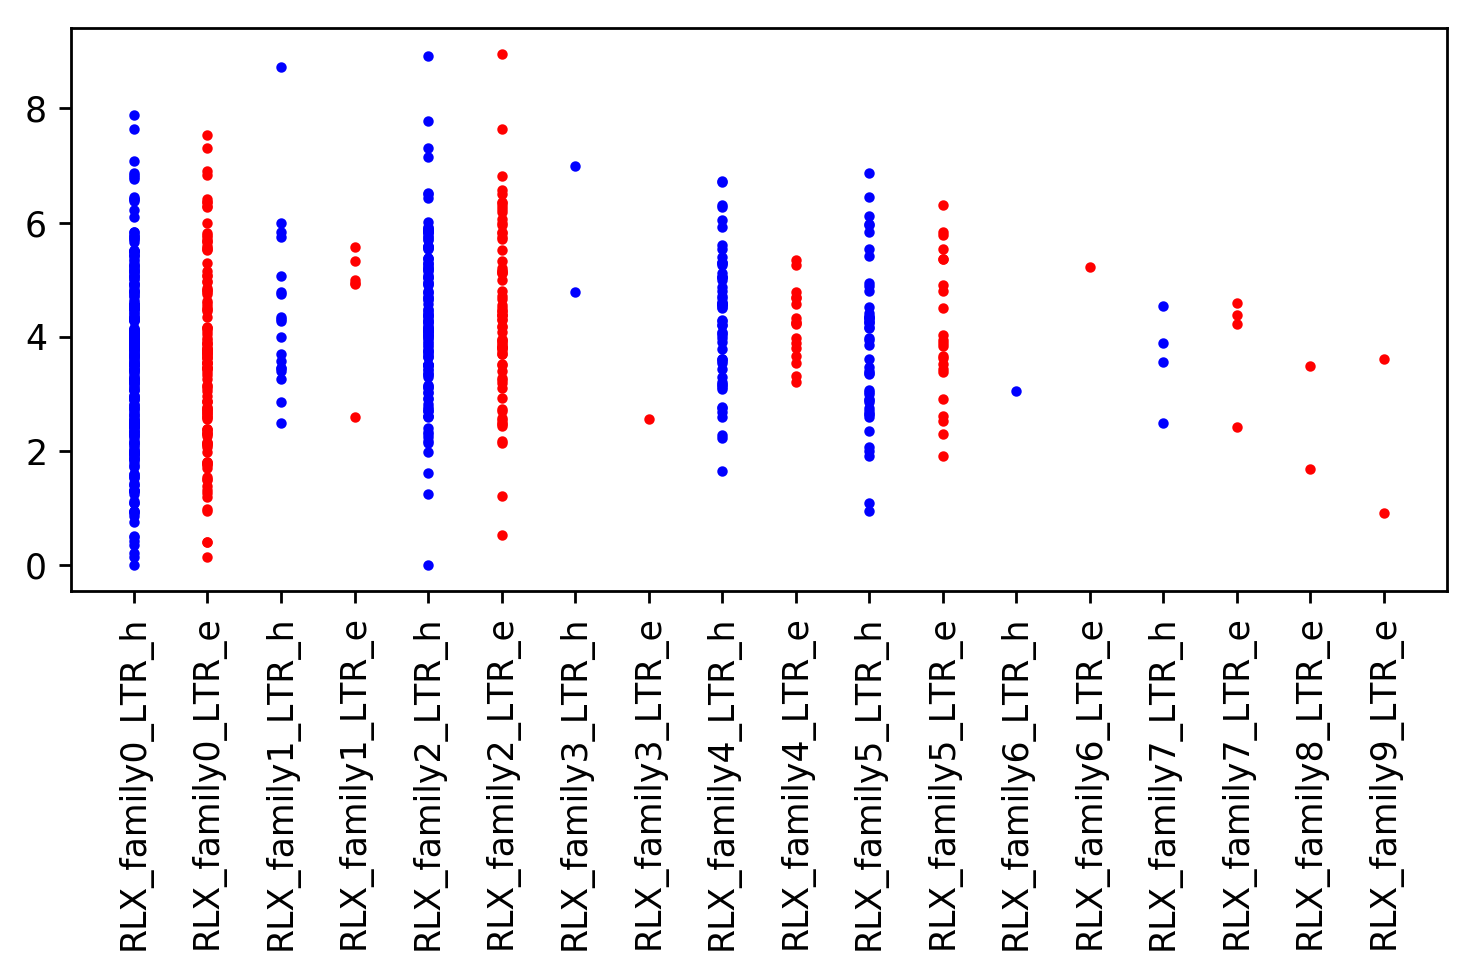

In [32]:
#scatter per family
plots = {}
plots['RLC'] = [0,2,4,10,16,20,28,30,34,39]
plots['RLG'] = [0,2,4,10,16,20,28,30,34,39]
plots['RLX'] = [0,2,4,10,16,20,28,30,34,39]
for what in ['RLG','RLC','RLX']:
    fig = plt.figure()
    plt.xticks(rotation='vertical', )
    plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=2.0)
    for family in range(10):#plots[what]:
        for where in ['heterochromatin','euchromatin']:
            df_genome_parts_now = df_genome_parts[df_genome_parts.feature == where]
            df_ages_now = df_ages[(df_ages.ID.str.contains("LTR")) &
                                (df_ages.ID.str.contains(what + '_family'))]

            df_ages_now['ID'] = df_ages_now['ID'].str.split('_').str[0:3].str.join('_')

            saved = []
            for k,v in df_genome_parts_now.iterrows():
                df_filter = df_ages_now[(df_ages_now.seqname == v.seqname) &
                                        (df_ages_now.start <= v.end) &
                                        (df_ages_now.end >= v.start) ]
                saved.append(df_filter)
            df_res = pd.concat(saved)

            df_res_f = df_res[df_res.ID.str.contains(what + '_family' + str(family) + '_')]
            df_res_f.ID = df_res_f.ID + '_' + where[0:1]
            df_res_f.to_csv('data/plots/scatter_' + what + '/data_' + str(family) + '_' +  where +'.csv',sep='\t', index=None)
            y = (df_res_f.Age / 1000000).tolist()
            x = df_res_f.ID
            #x.fill(pos)
            if where == 'heterochromatin':
                color = 'blue'
            else:
                color = 'red'
            plt.plot(x, y, 'o', color=color, markersize=2)
    fig.savefig('data/plots/scatter_' + what +'/scatter.svg')

In [17]:
#what = 'RLX'
what = 'RLG'
ylim = 250
where = 'heterochromatin'
#where = 'euchromatin'
#what = 'RLC'

RLC_family0 heterochromatin
RLC_family0 euchromatin
RLC_family1 heterochromatin
RLC_family1 euchromatin
RLC_family2 heterochromatin
RLC_family2 euchromatin
RLC_family3 heterochromatin
RLC_family3 euchromatin
RLC_family4 heterochromatin
RLC_family4 euchromatin
RLX_family0 heterochromatin
RLX_family0 euchromatin
RLX_family1 heterochromatin
RLX_family1 euchromatin
RLX_family2 heterochromatin
RLX_family2 euchromatin
RLX_family3 heterochromatin
RLX_family3 euchromatin
RLX_family4 heterochromatin
RLX_family4 euchromatin
RLG_family0 heterochromatin
RLG_family0 euchromatin
RLG_family1 heterochromatin
RLG_family1 euchromatin
RLG_family2 heterochromatin
RLG_family2 euchromatin
RLG_family3 heterochromatin
RLG_family3 euchromatin
RLG_family4 heterochromatin
RLG_family4 euchromatin


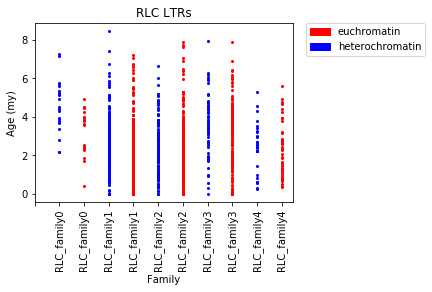

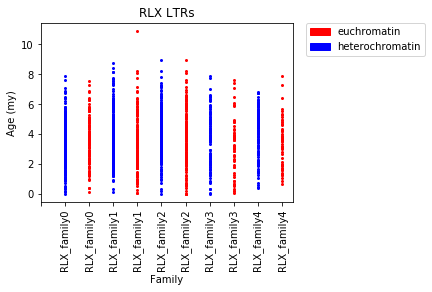

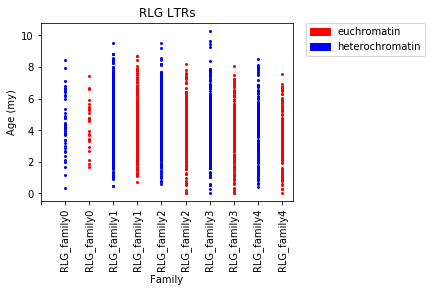

In [23]:
## scatterplot NO VA
for te_type in ['RLC', 'RLX', 'RLG']:
    terms = []
    for i in range(5):    
        terms.append( (te_type + '_family' + str(i),'heterochromatin') )
        terms.append( (te_type + '_family' + str(i),'euchromatin') )
    fig = plt.figure()
    plt.ylabel('Age (my)')
    plt.xlabel('Family')
    plt.title(te_type + ' LTRs')
    red_patch = mpatches.Patch(color='red', label='euchromatin')
    blue_patch = mpatches.Patch(color='blue', label='heterochromatin')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,handles=[red_patch,blue_patch ])
    xt = []
    xt.append("")
    pos = 0
    for (what, where) in terms:
        print(what, where)
        xt.append(what)
        pos += 1
        df_genome_parts_now = df_genome_parts[df_genome_parts.feature == where]
        df_genome_parts_now.head(3)

        df_ages_now = df_ages[(df_ages.ID.str.contains(what)) & 
                              (df_ages.ID.str.contains("LTR")) 
                              #(df_ages.ID.str.contains("family" + str(i) + "_LTR"))
                             ]
        
        if(len(df_ages_now.index)==0):
            continue
        df_ages_now.sample(3)
        
        saved = []
        for k,v in df_genome_parts_now.iterrows():
            df_filter = df_ages_now[(df_ages_now.seqname == v.seqname) &
                                    (df_ages_now.start <= v.end) &
                                    (df_ages_now.end >= v.start) ]
            saved.append(df_filter)
        df_res = pd.concat(saved)
        df_res.to_csv('data/plots/scatter_' + what + '_' + te_type +'.csv',sep='\t', index=None)
        y = (df_res.Age / 1000000).tolist()
        x = np.empty(len(y))
        x.fill(pos)
        if where == 'heterochromatin':
            color = 'blue'
        else:
            color = 'red'
        plt.plot(x, y, 'o', color=color, markersize=2)
    plt.xticks(np.arange(len(terms)+1), xt,rotation='vertical', )
    plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=1.0)
    fig.savefig('data/plots/scatter_' + te_type + '.svg', dpi=fig.dpi)


In [ ]:
df_ages['where'] = ''

In [ ]:
for k,v in df_genome_parts.iterrows():
    df_ages.loc[(df_ages.seqname == v.seqname) &
                (df_ages.start <= v.end) &
                (df_ages.end >= v.start) ,
                'where'] = v.feature

In [ ]:
df_ages.head(3)

In [ ]:
df_ages.to_csv('data/plots/ages_location.csv', index=None, header=None, sep='\t')

In [ ]:
#boxplot

In [ ]:
print(len(df_ages.index))

In [ ]:
df_ages = df_ages[df_ages['where'] != '']

In [ ]:
print(len(df_ages.index))

In [ ]:
df_ages.sample(4)

In [ ]:
for te_type in ['RLC', 'RLG', 'RLX']:
    data = df_ages[(df_ages.ID.str.contains(te_type)) & 
                   (df_ages.ID.str.contains('LTR'))]
    if len(data.index) == 0:
        continue
    fig = plt.figure()
    sns_plot = sns.boxplot(y='Age', x='where', 
                 data=data,
                 width=0.5,
                 palette="colorblind")
    sns_plot.figure.savefig("data/plots/box_" + te_type + ".svg")
    plt.close()

Total RLG 4501
RLG in heterochromatin 2737


NameError: name 'ylim' is not defined

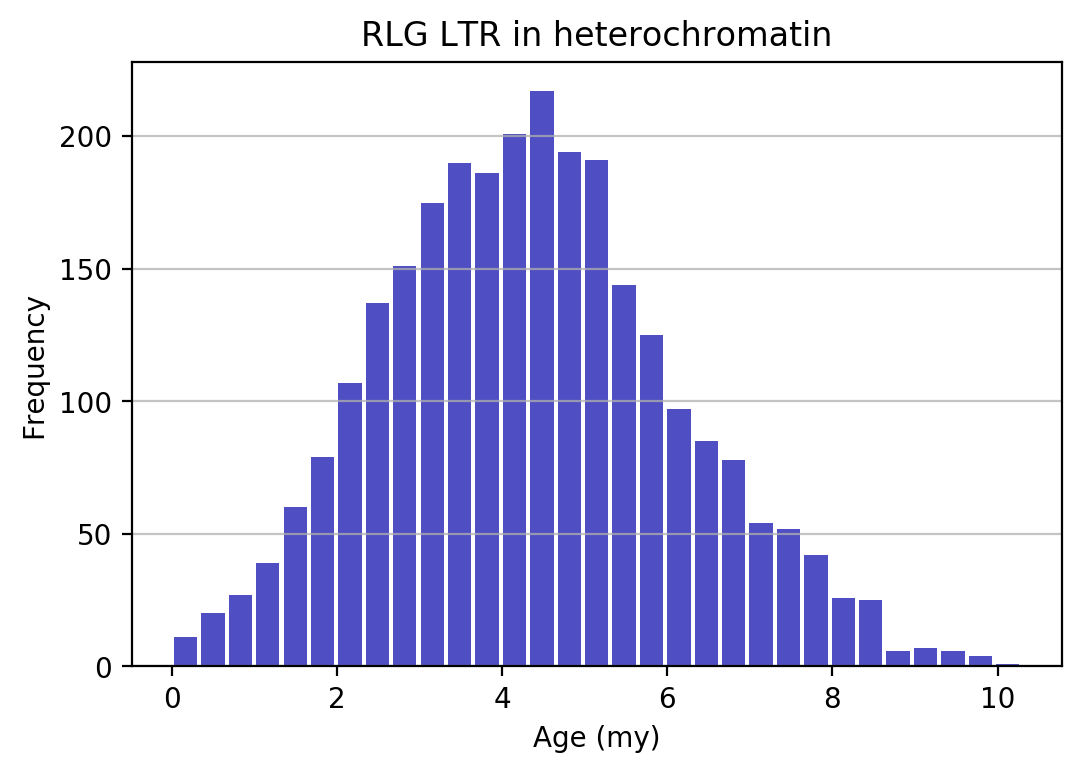

In [16]:
#histogram
terms = []
terms.append( ('RLG','heterochromatin') )
terms.append( ('RLG','euchromatin') )
terms.append( ('RLC','heterochromatin') )
terms.append( ('RLC','euchromatin') )
terms.append( ('RLX','heterochromatin') )
terms.append( ('RLX','euchromatin') )
elems = {}
elems_t = {}
for (what, where) in terms:
    df_genome_parts_now = df_genome_parts[df_genome_parts.feature == where]
       
    df_ages_now = df_ages[(df_ages.ID.str.contains(what)) & (df_ages.ID.str.contains("LTR"))]
    
    print('Total', what, len(df_ages_now.index))
    elems_t[what] = df_ages_now.ID.tolist()
    df_ages_now.sample(3)
    
    saved = []
    for k,v in df_genome_parts_now.iterrows():
        df_filter = df_ages_now[(df_ages_now.seqname == v.seqname) &
                                (df_ages_now.start <= v.end) &
                                (df_ages_now.end >= v.start) ]
        
        saved.append(df_filter)
    
    df_res = pd.concat(saved)
    
    print(what,'in',where, len(df_res.index))
    if not what in elems:
        elems[what] = []
    elems[what].extend(df_res.ID.tolist())

    path_save = 'data/plots/%s_%s' % (what, where)
    df_res.to_csv(path_save + '.csv', index=None)

    x = (df_res.Age / 1000000).tolist()

    # An "interface" to matplotlib.axes.Axes.hist() method
    fig = plt.figure()
    n, bins, patches = plt.hist(x=x, bins='auto', color='#0504aa',
                                alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Age (my)')
    plt.ylabel('Frequency')
    plt.title('%s LTR in %s' % (what, where))
    maxfreq = n.max()
    # Set a clean upper y-axis limit.
    plt.ylim([0,ylim])
    fig.savefig(path_save + '.svg', dpi=fig.dpi)
    print('saved to',path_save)